In [57]:
import pandas as pd
import time

# Load dataset
file_path = 'Data_Dummys.csv'
data = pd.read_csv(file_path)

# Melihat dataset
data.head()

,Temperatur,Kelembaban,Wind speed,Ketinggian air,Kondisi
0,35,23,63,47,2
1,36,46,73,52,3
2,34,39,14,44,2
3,31,66,75,31,1
4,31,77,52,36,1


In [58]:
import numpy as np

# Fungsi untuk mengubah Temperatur ke kondisi yang sesuai
def temperatur_to_cond(temp):
    if temp < 30:
        return 0
    elif 30 <= temp <= 33:
        return 1
    elif 34 <= temp <= 35:
        return 2
    else:
        return 3

# Fungsi untuk mengubah Kelembaban ke kondisi yang sesuai
def kelembaban_to_cond(humidity):
    if humidity > 80:
        return 0
    elif 61 <= humidity <= 80:
        return 1
    elif 41 <= humidity <= 60:
        return 2
    else:
        return 3

# Fungsi untuk mengubah Ketinggian air ke kondisi yang sesuai
def water_level_to_cond(water_level):
    if water_level < 30:
        return 0
    elif 31 <= water_level <= 39:
        return 1
    elif 41 <= water_level <= 49:
        return 2
    else:
        return 3

In [59]:
# Mengubah nilai pada dataset
data['Temperatur'] = data['Temperatur'].apply(temperatur_to_cond)
data['Kelembaban'] = data['Kelembaban'].apply(kelembaban_to_cond)
data['Ketinggian air'] = data['Ketinggian air'].apply(water_level_to_cond)

# Memisahkan features dan label
X = data[['Temperatur', 'Kelembaban', 'Ketinggian air']]
y = data['Kondisi']

# Membagi data menjadi training dan testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Catat waktu awal
start_time = time.time()

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model ANN
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Menggunakan softmax karena ada 4 kelas
])

model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model_ann.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluasi model
y_pred_ann = np.argmax(model_ann.predict(X_test_scaled), axis=-1)
print("ANN Model Evaluation:")
print(classification_report(y_test, y_pred_ann))

# Catat waktu akhir
end_time = time.time()

# Hitung waktu proses
process_time = end_time - start_time

print(f"Waktu proses: {process_time} detik")

# Save the model using the SavedModel format
model_save_path = "models/1/"
tf.saved_model.save(model_ann, model_save_path)
print(f"Model saved to: {model_save_path}")

i:\Projects\monitor_banjir\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
ANN Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      0.93      0.93        14
           2       0.92      1.00      0.96        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60

Waktu proses: 2.490265130996704 detik
INFO:tensorflow:Assets written to: models/1/assets


INFO:tensorflow:Assets written to: models/1/assets


Model saved to: models/1/


ANN Accuracy: 0.9667


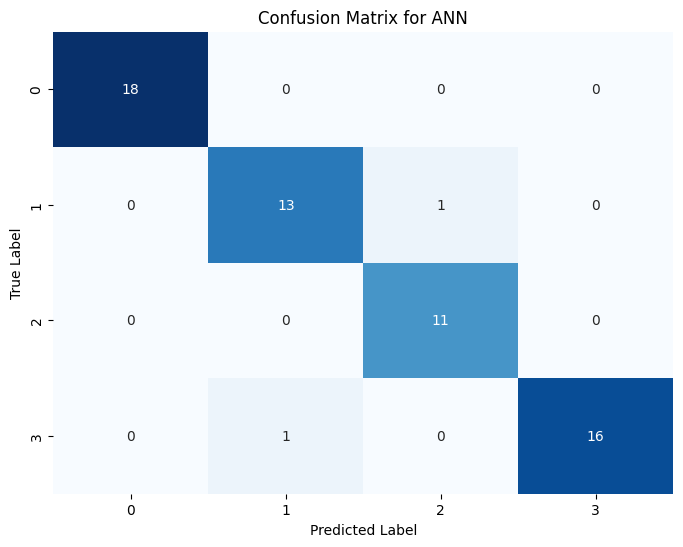

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan akurasi dan heatmap dari confusion matrix
def display_results(y_true, y_pred, model_name):
    # Menghitung dan menampilkan akurasi
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Menampilkan heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Menampilkan hasil untuk ANN
display_results(y_test, y_pred_ann, 'ANN')


In [63]:
# Memperbarui fungsi test_model untuk memasukkan pemrosesan Wind Speed
def test_model(temperatur, kelembaban, ketinggian_air):
    # Mengubah input menjadi kondisi sesuai dengan batasan yang ditetapkan
    temperatur_cond = temperatur_to_cond(temperatur)
    kelembaban_cond = kelembaban_to_cond(kelembaban)
    water_level_cond = water_level_to_cond(ketinggian_air)

    # Membuat array dari input
    input_data = np.array([[temperatur_cond, kelembaban_cond, water_level_cond]])

    # Scaling input data
    input_scaled = scaler.transform(input_data)

    # Prediksi menggunakan model ANN
    pred_ann = np.argmax(model_ann.predict(input_scaled), axis=-1)[0]

    # Menampilkan hasil prediksi
    print(f"Prediksi ANN: {pred_ann}")

In [64]:
# Contoh penggunaan fungsi:
test_model(temperatur=29, kelembaban=30, ketinggian_air=60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediksi ANN: 2


i:\Projects\monitor_banjir\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
